# Objective : To predict Customer churn process of a company.

In this task we need to predict whether customer is churning or not from company using other variable features like customerID, gender, etc.

* Target column is churn in this dataset.

#### Importing various libraries necessary for the task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
a = pd.read_csv('./Downloads/Telecom_customer_churn.csv')

In [3]:
a.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Checking for dimensions, description and pressence of null values in dataset.

In [4]:
a.shape

(7043, 21)

In [5]:
a.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
a.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

From above we can conclude this about dataset : 

* It contains 7043 rows and 21 columns
* description of dataset gives mean, max value, min value, etc of every column present in the dataset containing continuous data in them.
* There is pressence of no null values in dataset.

#### EDA

1. customerID

In [7]:
a['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [8]:
ab = []
for i in a['customerID']:
    i = i[-1]
    ab.append(i)

In [9]:
a['customerID'] = pd.Series(ab)

In [10]:
a['customerID'].unique()

array(['G', 'E', 'K', 'W', 'U', 'C', 'P', 'D', 'I', 'X', 'S', 'Z', 'T',
       'B', 'V', 'A', 'O', 'N', 'Q', 'L', 'F', 'Y', 'H', 'R', 'J', 'M'],
      dtype=object)

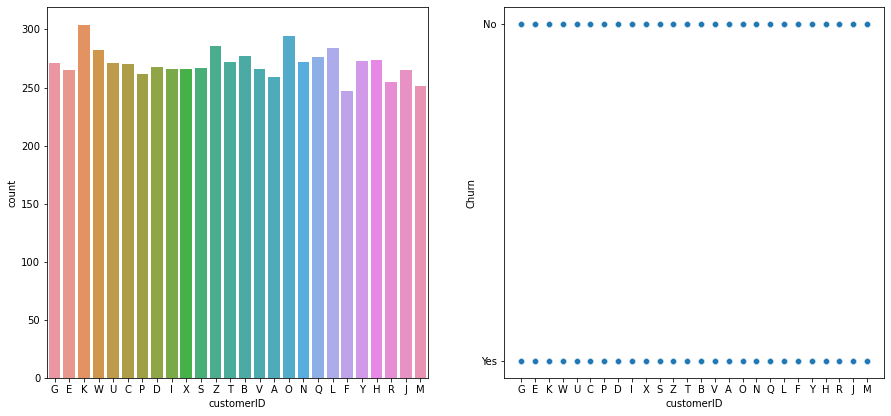

In [11]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['customerID'])
plt.xlabel('customerID')
plt.subplot(222)
sns.scatterplot(x= 'customerID', y= 'Churn', data= a)
plt.xlabel('customerID')
plt.ylabel('Churn')
plt.show()

by looking at both graphs of customerID we conclude that most people have their customerID end with K from countplot and from scatterplot we conclude that every category of customerID is present in both categories of Churn.

2. gender

In [12]:
a['gender'].unique()

array(['Female', 'Male'], dtype=object)

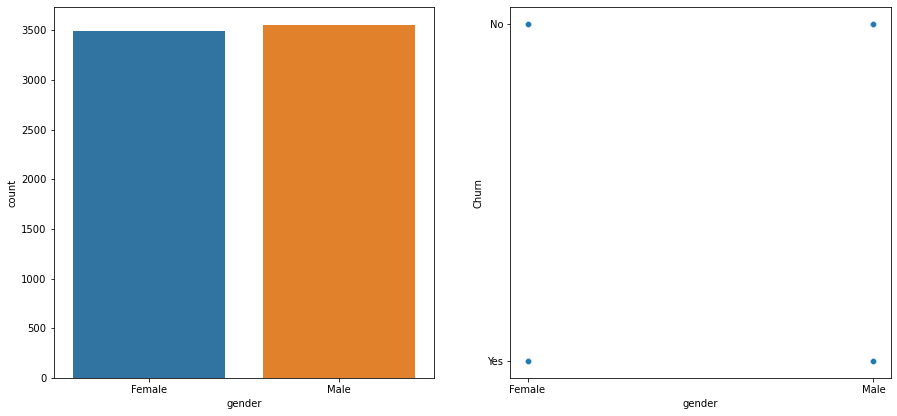

In [13]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['gender'])
plt.xlabel('gender')
plt.subplot(222)
sns.scatterplot(x= 'gender', y= 'Churn', data= a)
plt.xlabel('gender')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of gender we conclude that most people present are of male gender from countplot and from scatterplot we conclude that both categories of gender are present in both categories of Churn.

3. SeniorCitizen

In [14]:
a['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

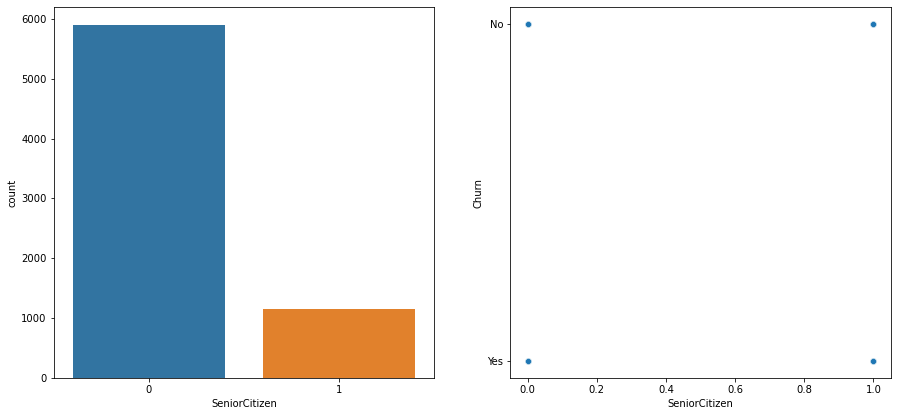

In [15]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['SeniorCitizen'])
plt.xlabel('SeniorCitizen')
plt.subplot(222)
sns.scatterplot(x= 'SeniorCitizen', y= 'Churn', data= a)
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of SeniorCitizen we conclude that most customers present are not senior citizens from countplot and from scatterplot we conclude that both categories of SeniorCitizen are present in both categories of Churn.

4. Partner

In [16]:
a['Partner'].unique()

array(['Yes', 'No'], dtype=object)

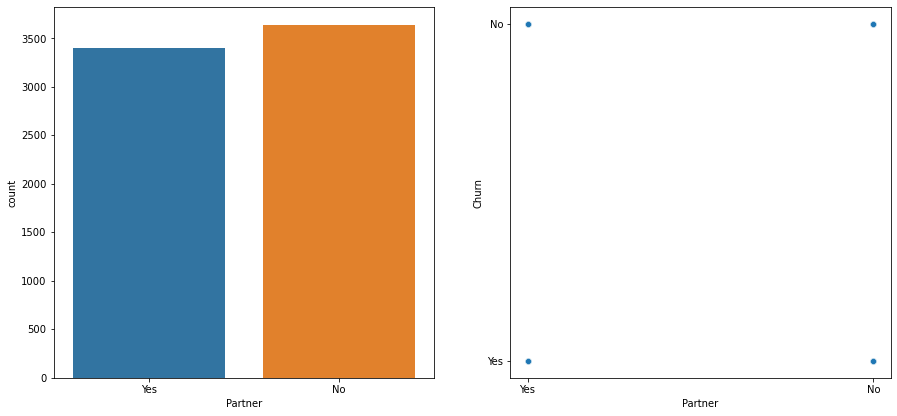

In [17]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['Partner'])
plt.xlabel('Partner')
plt.subplot(222)
sns.scatterplot(x= 'Partner', y= 'Churn', data= a)
plt.xlabel('Partner')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of Partner we conclude that most customers are without partner from countplot and from scatterplot we conclude that both categories of Partner are present in both categories of Churn.

5. Dependents

In [18]:
a['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

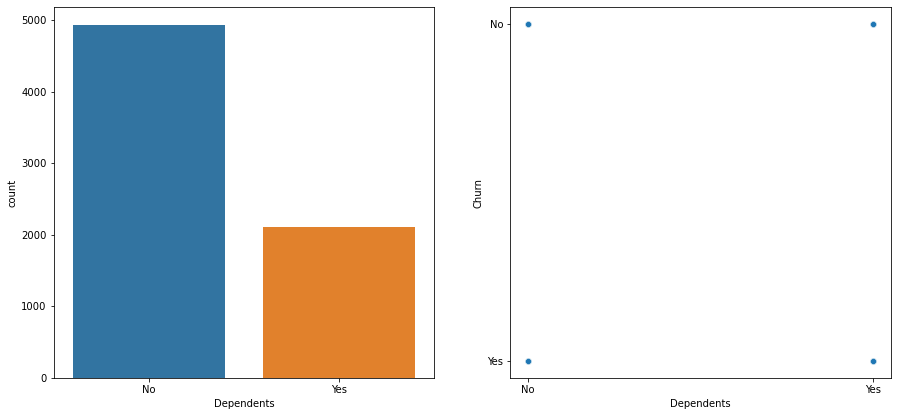

In [19]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['Dependents'])
plt.xlabel('Dependents')
plt.subplot(222)
sns.scatterplot(x= 'Dependents', y= 'Churn', data= a)
plt.xlabel('Dependents')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of Dependents that most customers present are without dependents from countplot and from scatterplot we conclude that both categories of dependents are present in both categories of Churn.

6. tenure

In [20]:
a['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

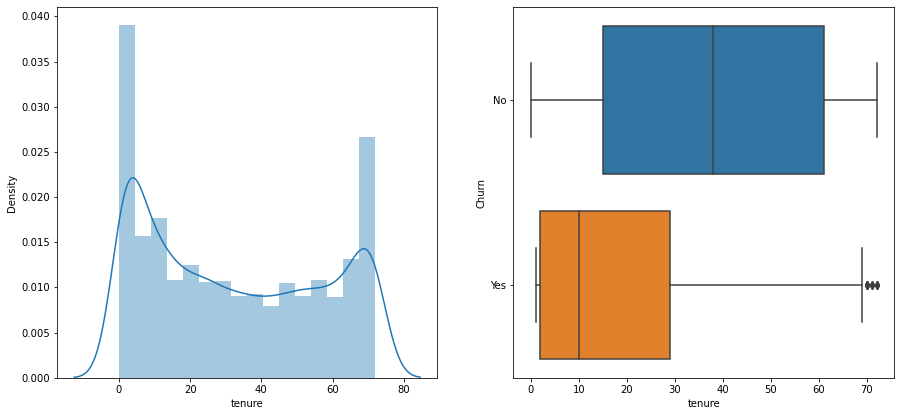

In [21]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(a['tenure'])
plt.xlabel('tenure')
plt.subplot(222)
sns.boxplot(x= 'tenure', y= 'Churn', data= a)
plt.xlabel('tenure')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of tenure we conclude the we cannot determine the skewness of data with data having highest density at around 2 or 3 from distplot and from boxplot we conclude that the outliers of tenure are only present in Yes category of Churn.

7. PhoneService

In [22]:
a['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

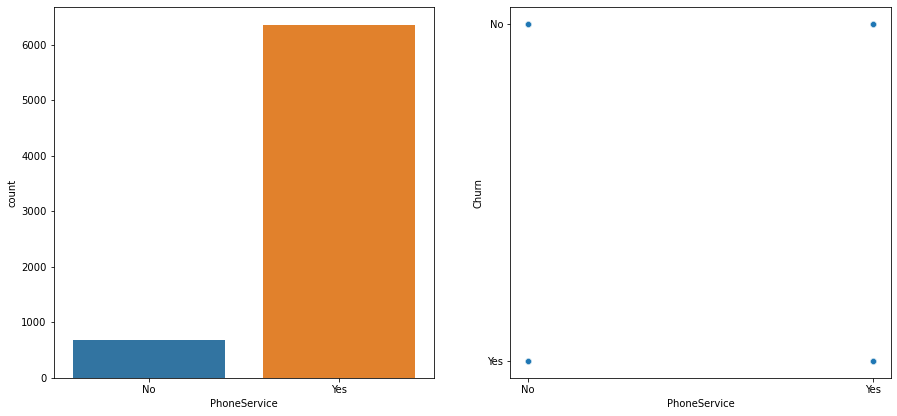

In [23]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['PhoneService'])
plt.xlabel('PhoneService')
plt.subplot(222)
sns.scatterplot(x= 'PhoneService', y= 'Churn', data= a)
plt.xlabel('PhoneService')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of PhoneService we conclude that most people having the PhoneService from countplot and from scatterplot we conclude that both categories of PhoneService are present in both categories of Churn.

8. Multiplelines

In [24]:
a['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

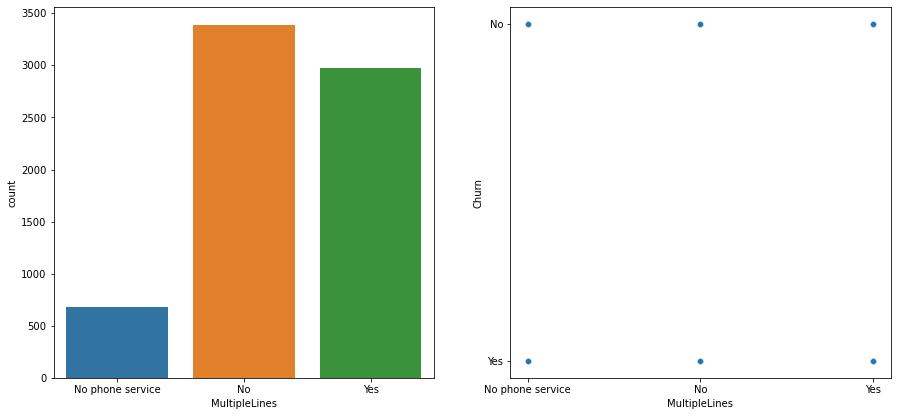

In [25]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['MultipleLines'])
plt.xlabel('MultipleLines')
plt.subplot(222)
sns.scatterplot(x= 'MultipleLines', y= 'Churn', data= a)
plt.xlabel('MultipleLines')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of MultipleLines most customers are present with category No MultipleLines from countplot and from scatterplot we conclude that every category of multiplelines are present in both categories of Churn.

9. InternetService

In [26]:
a['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

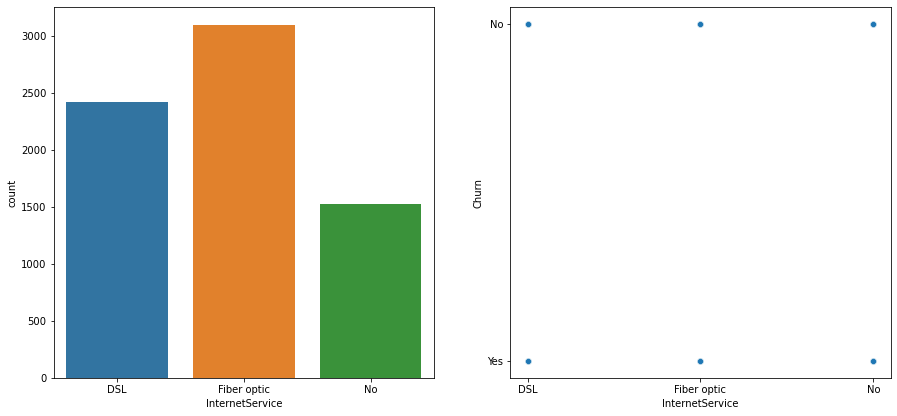

In [27]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['InternetService'])
plt.xlabel('InternetService')
plt.subplot(222)
sns.scatterplot(x= 'InternetService', y= 'Churn', data= a)
plt.xlabel('InternetService')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of InternetService we conclude that most number of customers have Fiber optic as their InternetService from countplot and from scatterplot we conclude that every category of InternetService is present in both categories of Churn.

10. OnlineSecurity

In [28]:
a['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

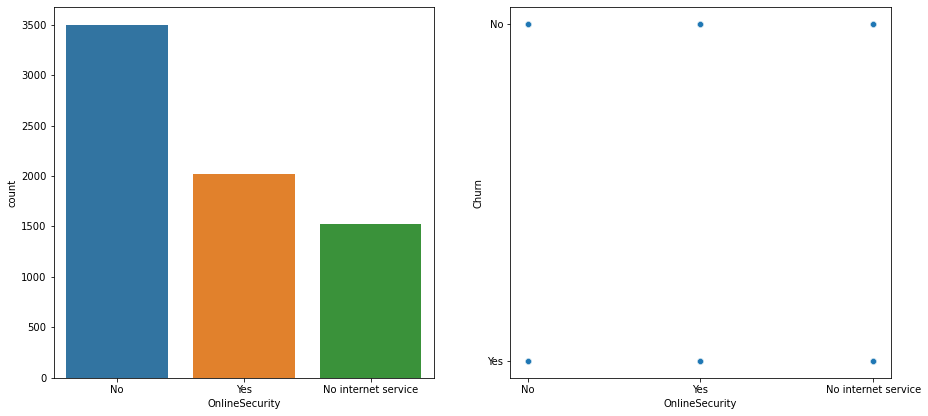

In [29]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['OnlineSecurity'])
plt.xlabel('OnlineSecurity')
plt.subplot(222)
sns.scatterplot(x= 'OnlineSecurity', y= 'Churn', data= a)
plt.xlabel('OnlineSecurity')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of OnlineSecurity we conclude that most customers present with No OnlineSecurity from countplot and from scatterplot we conclude that every category of OnlineSecurity is present in both categories of Churn.

11. OnlineBackup

In [30]:
a['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

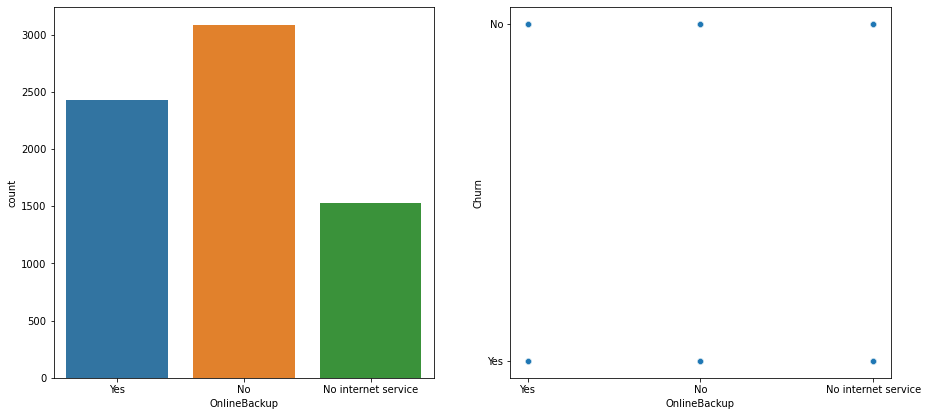

In [31]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['OnlineBackup'])
plt.xlabel('OnlineBackup')
plt.subplot(222)
sns.scatterplot(x= 'OnlineBackup', y= 'Churn', data= a)
plt.xlabel('OnlineBackup')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of OnlineBackup we conclude that most customers present with No OnlineBackup from countplot and from scatterplot we conclude that every category of OnlineBackup is present in both categories of Churn.

12. DeviceProtection

In [32]:
a['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

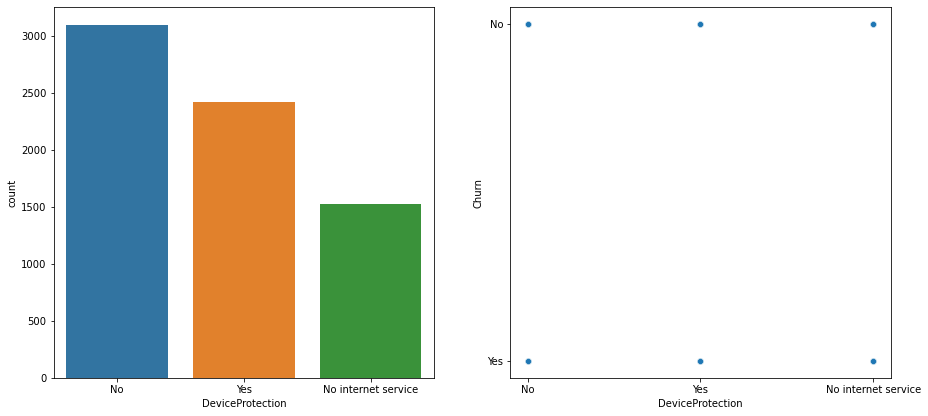

In [33]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['DeviceProtection'])
plt.xlabel('DeviceProtection')
plt.subplot(222)
sns.scatterplot(x= 'DeviceProtection', y= 'Churn', data= a)
plt.xlabel('DeviceProtection')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of DeviceProtection we conclude that most customers present with No DeviceProtection from countplot and from scatterplot we conclude that every category of DeviceProtection are present in both categories of Churn.

13. TechSupport

In [34]:
a['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

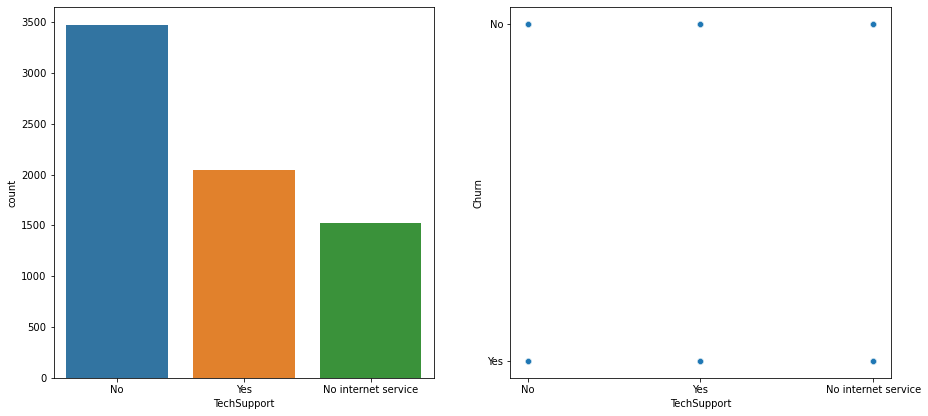

In [35]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['TechSupport'])
plt.xlabel('TechSupport')
plt.subplot(222)
sns.scatterplot(x= 'TechSupport', y= 'Churn', data= a)
plt.xlabel('TechSupport')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of TechSupport we conclude that most customers present with No TechSupport from countplot and from scatterplot we conclude that every category of TechSupport are present in both categories of Churn.

14. StreamingTV

In [36]:
a['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

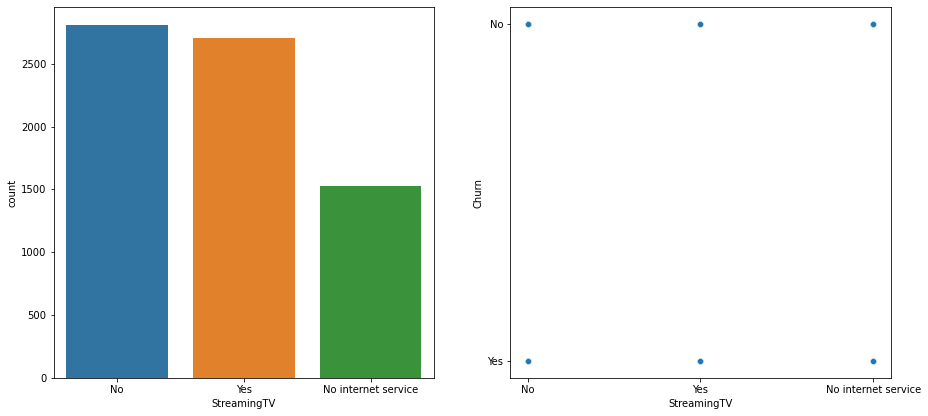

In [37]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['StreamingTV'])
plt.xlabel('StreamingTV')
plt.subplot(222)
sns.scatterplot(x= 'StreamingTV', y= 'Churn', data= a)
plt.xlabel('StreamingTV')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of StreamingTV we conclude that most customers present with No StreamingTV from countplot and from scatterplot we conclude that every category of StreamingTV are present in both categories of Churn.

15. StreamingMovies

In [38]:
a['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

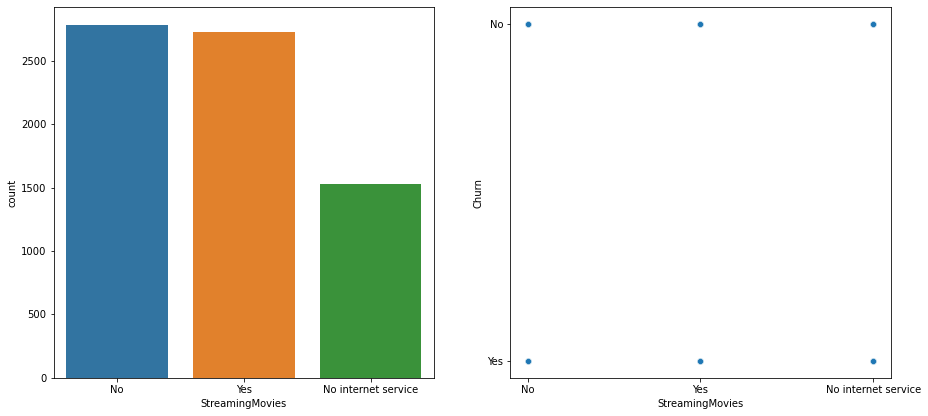

In [39]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['StreamingMovies'])
plt.xlabel('StreamingMovies')
plt.subplot(222)
sns.scatterplot(x= 'StreamingMovies', y= 'Churn', data= a)
plt.xlabel('StreamingMovies')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of StreamingMovies we conclude that most customers present with No StreamingMovies from countplot and from scatterplot we conclude that every category of StreamingMovies are present in both categories of Churn.

16. Contract

In [40]:
a['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

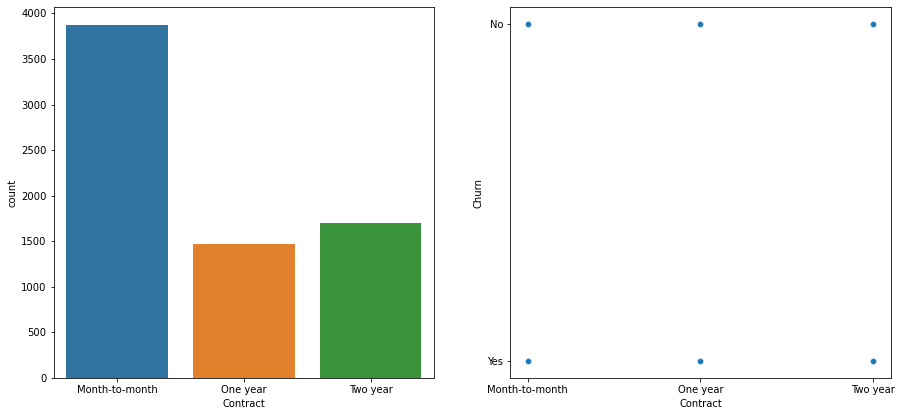

In [41]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['Contract'])
plt.xlabel('Contract')
plt.subplot(222)
sns.scatterplot(x= 'Contract', y= 'Churn', data= a)
plt.xlabel('Contract')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of Contract we conclude that most number of customers are having month-to-month contracts from countplot and from scatterplot we conclude that every category of contract is present in both categories of Churn.

17. PaperlessBilling

In [42]:
a['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

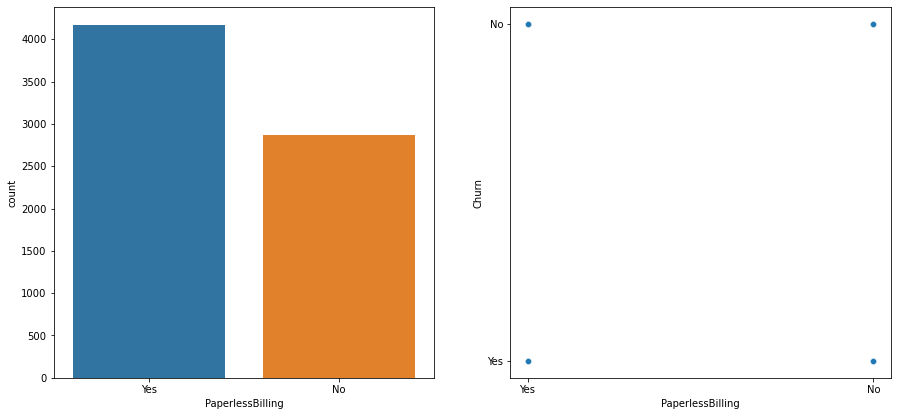

In [43]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['PaperlessBilling'])
plt.xlabel('PaperlessBilling')
plt.subplot(222)
sns.scatterplot(x= 'PaperlessBilling', y= 'Churn', data= a)
plt.xlabel('PaperlessBilling')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of PaperlessBilling we conclude that most customers are using PaperlessBilling from countplot and from scatterplot we conclude that both categories Of PaperlessBilling are present in both categories of Churn.

18. PaymentMethods

In [44]:
a['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

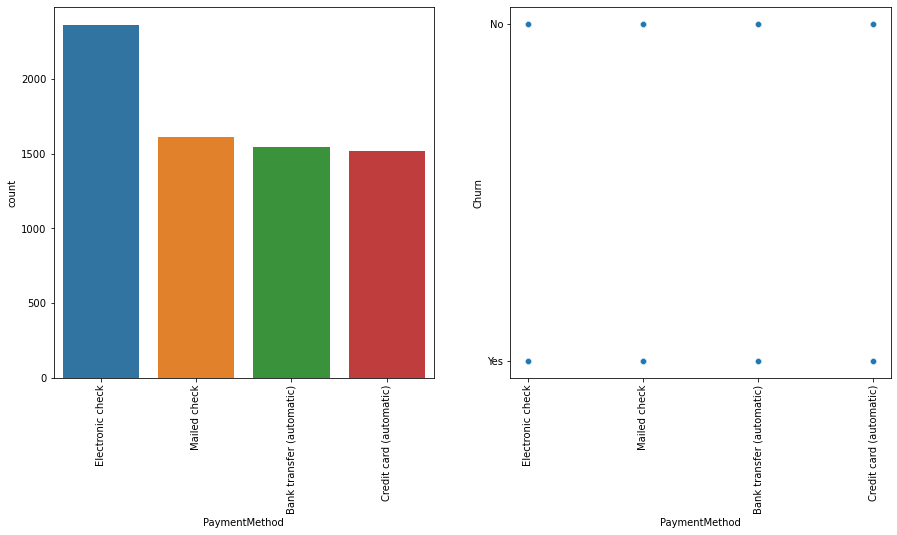

In [45]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(a['PaymentMethod'])
plt.xlabel('PaymentMethod')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'PaymentMethod', y= 'Churn', data= a)
plt.xlabel('PaymentMethod')
plt.xticks(rotation= 90)
plt.ylabel('Churn')
plt.show()

By looking at both graphs of PaymentMethod we conclude that most people do their paymnets via Electronic check from countplot and from scatterplot we conclude that every category of PaymentMethod is present in both categories of Churn.

19. MonthlyCharges

In [46]:
a['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

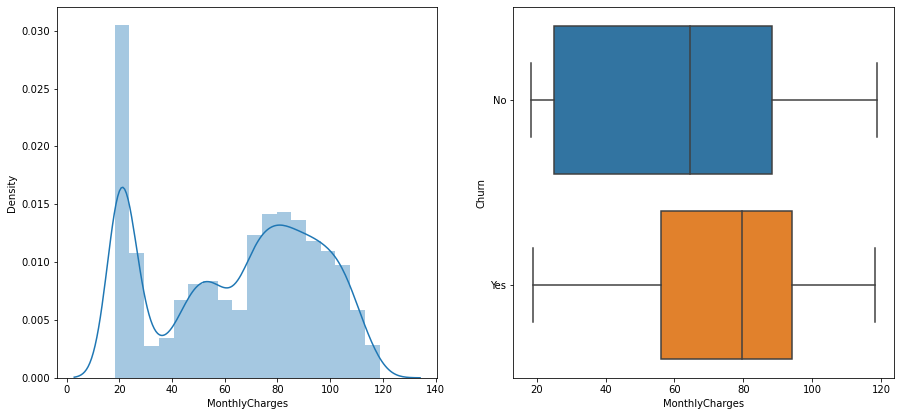

In [47]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(a['MonthlyCharges'])
plt.xlabel('MonthlyCharges')
plt.subplot(222)
sns.boxplot(x= 'MonthlyCharges', y= 'Churn', data= a)
plt.xlabel('MonthlyCharges')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of MonthlyCharges we conclude that we cannot determine the skewness of the data with data having highest density around 23 from distplot and from boxplot we conclude that there are no outliers of MonthlyCharges are present in any of the category of Churn.

20. TotalCharges

In [48]:
a['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [49]:
a.loc[(a['TotalCharges']== ' '), 'TotalCharges']= '0'

In [50]:
a['TotalCharges'][488]

'0'

In [51]:
a['TotalCharges'] = pd.to_numeric(a['TotalCharges'])

In [52]:
a['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

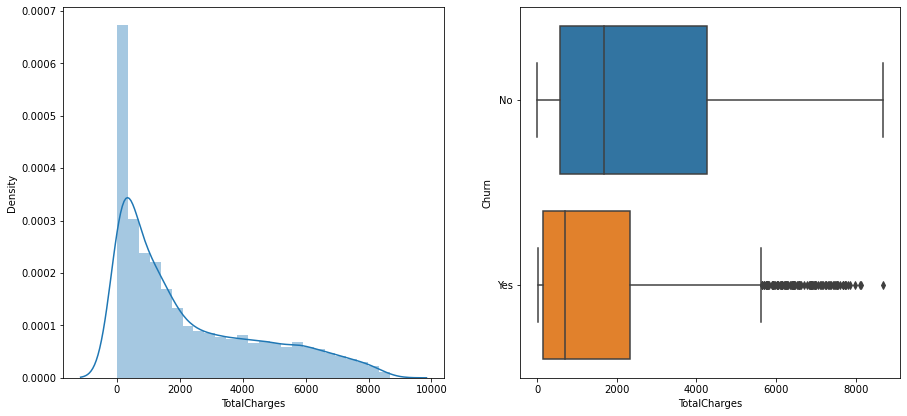

In [53]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(a['TotalCharges'])
plt.xlabel('TotalCharges')
plt.subplot(222)
sns.boxplot(x= 'TotalCharges', y= 'Churn', data= a)
plt.xlabel('TotalCharges')
plt.ylabel('Churn')
plt.show()

By looking at both graphs of TotalCharges we conclude that data is positively skewed with having highest density around 100 from distplot and from boxplot we conclude that outliers of TotalCharges are present in category Yes of Churn.

#### Now Checking Datatypes of every columns in the dataset and changing it to int or float datatype.

In [54]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:
a['customerID'].unique()

array(['G', 'E', 'K', 'W', 'U', 'C', 'P', 'D', 'I', 'X', 'S', 'Z', 'T',
       'B', 'V', 'A', 'O', 'N', 'Q', 'L', 'F', 'Y', 'H', 'R', 'J', 'M'],
      dtype=object)

In [56]:
a['customerID'] = a['customerID'].replace(['G', 'E', 'K', 'W', 'U', 'C', 'P', 'D', 'I', 'X', 'S', 'Z', 'T',
                                           'B', 'V', 'A', 'O', 'N', 'Q', 'L', 'F', 'Y', 'H', 'R', 'J', 'M'],
                                          np.arange(0,26))

In [57]:
a['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [58]:
a['gender'] = a['gender'].replace(['Female', 'Male'],[0,1])

In [59]:
a['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [60]:
a['Partner'] = a['Partner'].replace(['Yes','No'],[1,0])

In [61]:
a['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [62]:
a['Dependents'] = a['Dependents'].replace(['Yes','No'],[1,0])

In [63]:
a['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [64]:
a['PhoneService'] = a['PhoneService'].replace(['Yes','No'],[1,0])

In [65]:
a['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [67]:
a['MultipleLines'] = a['MultipleLines'].replace(['No phone service', 'No', 'Yes'],[2,0,1])

In [68]:
a['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [69]:
a['InternetService'] = a['InternetService'].replace(['DSL', 'Fiber optic', 'No'],[2,1,0])

In [70]:
a['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [71]:
a['OnlineSecurity'] = a['OnlineSecurity'].replace(['No', 'Yes', 'No internet service'],[0,1,2])

In [72]:
a['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [73]:
a['OnlineBackup'] = a['OnlineBackup'].replace(['Yes', 'No', 'No internet service'],[1,0,2])

In [74]:
a['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [76]:
a['DeviceProtection'] = a['DeviceProtection'].replace(['No', 'Yes', 'No internet service'],[0,1,2])

In [77]:
a['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [78]:
a['TechSupport'] = a['TechSupport'].replace(['No', 'Yes', 'No internet service'],[0,1,2])

In [79]:
a['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [80]:
a['StreamingTV'] = a['StreamingTV'].replace(['No', 'Yes', 'No internet service'],[0,1,2])

In [81]:
a['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [82]:
a['StreamingMovies'] = a['StreamingMovies'].replace(['No', 'Yes', 'No internet service'],[0,1,2])

In [83]:
a['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [84]:
a['Contract'] = a['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2])

In [85]:
a['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [86]:
a['PaperlessBilling'] = a['PaperlessBilling'].replace(['Yes','No'],[1,0])

In [87]:
a['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [88]:
a['PaymentMethod'] = a['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
                                                 'Credit card (automatic)'],[0,1,2,3])

#### Now creating Heatmap to check correlation of datasets

In [89]:
a['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [90]:
a['Churn'] = a['Churn'].replace(['Yes','No'],[1,0])

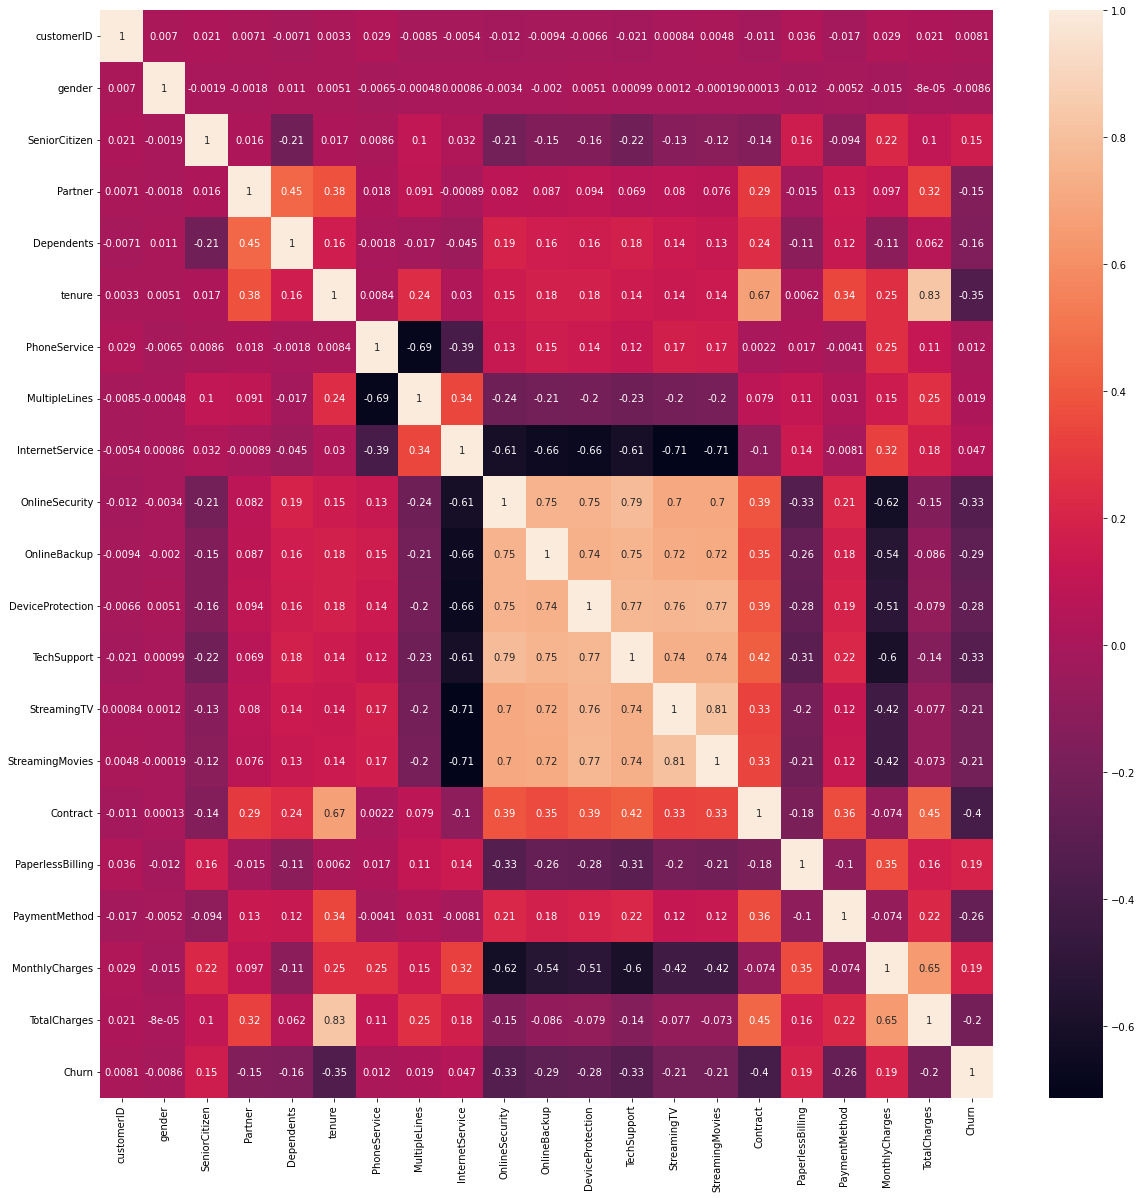

In [92]:
plt.figure(figsize= [20,20])
sns.heatmap(a.corr(), annot= True)
plt.show()

By looking at heatmap we conclude that target column (Churn) has high positive correlation with columns like (SeniorCitizen, PaperlessBilling, MonthlyCharges) and it has high negative correlation with columns like (Partner, Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod, TotalCharges) and hence we conclude that we can drop these columns to reduce multicollinearity and refine data (PhoneService, MultipleLines, InternetService).

In [93]:
a.drop(['PhoneService','MultipleLines','InternetService'], axis= 1, inplace= True)

In [94]:
a['Churn'] = a['Churn'].replace([1,0],['Yes','No'])

#### Now Checking multiple models on dataset to find the best model fit for the dataset to work on.

1. Logistic Regression Model.

In [96]:
X = a.drop(['Churn'], axis= 1)
y = a['Churn']

In [97]:
lr = LogisticRegression()
lrf = GridSearchCV(lr, param_grid= {'C': [1,2,3,4,5]}, scoring= 'accuracy', cv= 5)

In [98]:
scaler = StandardScaler()
trainaccuracy = []
testaccuracy = []
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    lrf.fit(scaledX_train, y_train)
    trainaccuracy.append(lrf.score(scaledX_train, y_train))
    testaccuracy.append(lrf.score(scaledX_test, y_test))
print('trainaccuracy : ', np.mean(trainaccuracy))
print('testaccuracy : ', np.mean(testaccuracy))

trainaccuracy :  0.8027375993941689
testaccuracy :  0.7988529244747303


In [100]:
dt = DecisionTreeClassifier(criterion= 'entropy')
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [101]:
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    dtf.fit(scaledX_train, y_train)
    trainaccuracy.append(dtf.score(scaledX_train, y_train))
    testaccuracy.append(dtf.score(scaledX_test, y_test))
print('trainaccuracy : ', np.mean(trainaccuracy))
print('testaccuracy : ', np.mean(testaccuracy))

trainaccuracy :  0.802042786823173
testaccuracy :  0.793480976717774


In [102]:
rf = RandomForestClassifier(criterion= 'entropy')
rff = GridSearchCV(rf, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [103]:
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    rff.fit(scaledX_train, y_train)
    trainaccuracy.append(rff.score(scaledX_train, y_train))
    testaccuracy.append(rff.score(scaledX_test, y_test))
print('trainaccuracy : ', np.mean(trainaccuracy))
print('testaccuracy : ', np.mean(testaccuracy))

trainaccuracy :  0.803434305187429
testaccuracy :  0.7942229793677834


In [104]:
bc = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion= 'entropy'))
bcf = GridSearchCV(bc, param_grid= {'n_estimators': [10,20,30,40,50], 'max_samples': [1,2,3,4,5], 'max_features': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [105]:
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    bcf.fit(scaledX_train, y_train)
    trainaccuracy.append(bcf.score(scaledX_train, y_train))
    testaccuracy.append(bcf.score(scaledX_test, y_test))
print('trainaccuracy : ', np.mean(trainaccuracy))
print('testaccuracy : ', np.mean(testaccuracy))

trainaccuracy :  0.7885005679666793
testaccuracy :  0.7815275411697898


In [106]:
sv = SVC()
svf = GridSearchCV(sv, param_grid= {'kernel': ['rbf','linear'], 'C': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [107]:
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    svf.fit(scaledX_train, y_train)
    trainaccuracy.append(svf.score(scaledX_train, y_train))
    testaccuracy.append(svf.score(scaledX_test, y_test))
print('trainaccuracy : ', np.mean(trainaccuracy))
print('testaccuracy : ', np.mean(testaccuracy))

trainaccuracy :  0.7926762589928057
testaccuracy :  0.7843975014196478


#### Now the best suited model for this dataset is Logistic Regression because it is giving the best test accuracy score.

In [108]:
lrf.best_params_

{'C': 1}

In [109]:
lr = LogisticRegression(C= 1)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 167)

In [119]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [120]:
pred = lr.fit(scaledX_train, y_train).predict(scaledX_test)

In [121]:
df = pd.DataFrame({'Actual': y_test, 'Prediction': pred})

In [122]:
df.head()

,Actual,Prediction
2664,No,No
166,Yes,Yes
2769,Yes,No
5334,Yes,No
1224,Yes,Yes


#### Now checking performance of model through various metrices

In [123]:
print('accuracy score : ', metrics.accuracy_score(y_test, pred))

accuracy score :  0.7995457126632595


In [124]:
print('confusion matrix : ')
metrics.confusion_matrix(y_test, pred)

confusion matrix : 


array([[1146,  154],
       [ 199,  262]], dtype=int64)

In [125]:
print('cohen kappa score : ', metrics.cohen_kappa_score(y_test, pred))

cohen kappa score :  0.4644995671256714


#### By looking at the score of various metrices of this model we can conclude that this model is performing quite well on the dataset and giving 79.95% accuracy on prediction and the cohen kappa score is 0.4644 which is showing that model is performing quite well as we know that any cohen kappa score above 0.40 is known to be performing quite well. Now we need to save the model.

In [126]:
save_lr = pickle.dumps(lr)

#### Hence we have saved the model and also performed the prediction on the dataset which is giving the 0.7995 accuracy score. So, the objective has been achieved and the task has been completed.